### Enabling TensorFlow 2 version 

In [9]:
# Colab has two versions of TensorFlow installed: a 1.x version and a 2.x version. 
# Colab currently uses TF 1.x by default
# To enable TF2 execute the following code

%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)


2.2.0


### Mounting the Google Drive 

In [10]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


### Make sure to check that your data is at correct location

In [11]:
!ls /content/gdrive/'My Drive'/'Colab Notebooks'/data.h5.zip

'/content/gdrive/My Drive/Colab Notebooks/data.h5.zip'


### Decompress the zip file stored in our google drive 

In [12]:
!unzip "/content/gdrive/My Drive/Colab Notebooks/data.h5.zip"

Archive:  /content/gdrive/My Drive/Colab Notebooks/data.h5.zip
  inflating: data1.h5                


### Loading the Train and the test data 


In [13]:
import numpy as np
import h5py


def loadDataH5():
        

    with h5py.File('data1.h5','r') as hf:
        trainX = np.array(hf.get('trainX'))
        trainY = np.array(hf.get('trainY'))
        valX = np.array(hf.get('valX'))
        valY = np.array(hf.get('valY'))
        print (trainX.shape,trainY.shape)
        print (valX.shape,valY.shape)
    return trainX, trainY, valX, valY

X_train, y_train, X_test, y_test = loadDataH5()

print('Shape of the feature training data: \n', X_train.shape)
print('Shape of the true training class labels: \n', y_train.shape)
print()
print('Shape of the feature test data: \n', X_test.shape)
print('Shape of the true test class labels: \n', y_test.shape)

(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)
Shape of the feature training data: 
 (1020, 128, 128, 3)
Shape of the true training class labels: 
 (1020,)

Shape of the feature test data: 
 (340, 128, 128, 3)
Shape of the true test class labels: 
 (340,)


### Beginning of our TensorFlow Keras Code 

In [0]:
# Importing the necessary libraries 
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np 
import matplotlib.pyplot as plt
import h5py

### Function for Complile & Train the model, Plot the output results  

In [0]:
#------------------------------------- SPECIFYING THE EXECUTION PARAMETERS---------------------------------------------------------

def compile_train_plot(model):
  """
  This function compiles and train the model and produce the desired results 
  """
  # Specify the number of epochs 
  NUM_EPOCHS = 70

  # Initialize the optimizer and model
  print("Compiling model...")

  # Set the optimizer 
  opt = tf.keras.optimizers.SGD(lr=0.01)

  # Print the model settings 
  print (model.summary())

  # Compile the model 
  model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

#-------------------------------------- CODE FOR TRAINING THE MODEL--------------------------------------------------------

  # Train the network
  print("Training network...")
  history= model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=NUM_EPOCHS)

#-----------------------CODE FOR PLOTTING THE TRAINING LOSS AND ACCURACY & VALIDATION LOSS AND ACCURACY-------------------------- 

  plt.style.use("ggplot")
  plt.figure()

  upper_limit= NUM_EPOCHS
  plt.plot(np.arange(0, upper_limit), history.history["loss"], label="train_loss")
  plt.plot(np.arange(0, upper_limit), history.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, upper_limit), history.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, upper_limit), history.history["val_accuracy"], label="val_acc")
  plt.title("Number of Epochs vs Training/Validation Loss and Accuracy")
  plt.xlabel("Number of Epochs")
  plt.ylabel("Loss/Accuracy")
  plt.legend()
  plt.show()
#------------------------------ TEST SET RESULTS-------------------------------------------------

  # Get the predictions from our basic model 
  results= model.evaluate(X_test, y_test)
  # Print the test set loss and the accuracy 
  print("The test set loss and accuracy is \n",results)

### Architecture 1 - Baseline CNN Model 

Compiling model...
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_13 (Dense)             (None, 17)                2228241   
Total params: 2,229,137
Trainable params: 2,229,137
Non-trainable params: 0
_________________________________________________________________
None
Training network...
Epoch 1/70
32/32 [==============================] - 1s 28ms/step - loss: 2.5644 - accuracy: 0.1765 - val_loss: 2.2381 - val_accuracy: 0.2559
Epoch 2/70
32/32 [==============================] - 1s 22

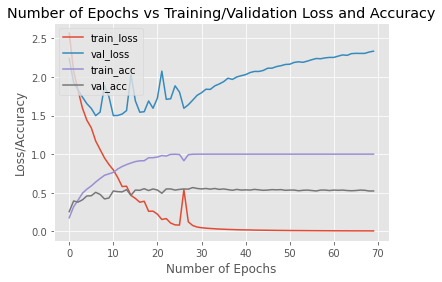

11/11 [==============================] - 0s 8ms/step - loss: 2.3324 - accuracy: 0.5235
The test set loss and accuracy is 
 [2.3323564529418945, 0.5235294103622437]


In [0]:
#------------------------------------- BUILDING THE BASELINE NETWORK ARCHITECTURE---------------------------------------------------------

def arch_baseline(width, height, depth, classes):
  
  # Initialize the model along with the input shape to be "channels last"
  model = tf.keras.Sequential() 
  inputShape = (height, width, depth)

  # Define the first layer that is convolutional layer
  model.add(tf.keras.layers.Conv2D (32, (3, 3), padding="same", input_shape=inputShape, activation='relu'))

  # Define the second layer that is pooling layer 
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

  # Define the third layer that is flatten layer
  model.add(tf.keras.layers.Flatten())
  
  # Define the fourth and the output layer that is softmax layer
  model.add(tf.keras.layers.Dense(classes, activation='softmax'))
  
  return model

#-------------------------------- MODEL CREATION, TRAINING and RESULTS----------------------------------

# Call the defined baseline model 
model= arch_baseline(width=128, height=128, depth=3, classes=17)

# Compile and train the model and produce the plots 
compile_train_plot(model)

### Architecture 2 -CNN

Compiling model...
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 65536)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 200)               13107400  
_________________________________________________________________
dense_19 (Dense)             (None

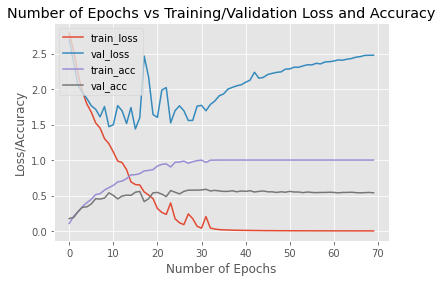

11/11 [==============================] - 0s 12ms/step - loss: 2.4763 - accuracy: 0.5382
The test set loss and accuracy is 
 [2.476296901702881, 0.5382353067398071]


In [0]:
#------------------------------------- BUILDING THE NETWORK ARCHITECTURE 2---------------------------------------------------------

def arch_net2(width, height, depth, classes):
  
  # Initialize the model along with the input shape to be "channels last"
  model = tf.keras.Sequential() 
  inputShape = (height, width, depth)

  # Define the first layer that is convolutional layer
  model.add(tf.keras.layers.Conv2D (32, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
  # Define the second layer that is pooling layer 
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

  # Define the third layer that is convolutional layer
  model.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
  # Define the fourth layer that is pooling layer 
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

  # Define the fifth layer that is flatten layer
  model.add(tf.keras.layers.Flatten())

  # Define the sixth layer that is dense layer 
  model.add(tf.keras.layers.Dense(200, activation='relu'))

  # Define the seventh and the output layer that is softmax layer
  model.add(tf.keras.layers.Dense(classes, activation='softmax'))

  return model

#-------------------------------- MODEL CREATION, TRAINING and RESULTS----------------------------------

# Call the defined baseline model 
model= arch_net2(width=128, height=128, depth=3, classes=17)

# Compile and train the model and produce the plots 
compile_train_plot(model)

### Architecture 3 - CNN 

Compiling model...
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None,

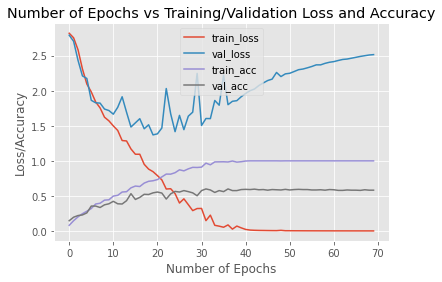

11/11 [==============================] - 0s 8ms/step - loss: 2.5149 - accuracy: 0.5824
The test set loss and accuracy is 
 [2.5149118900299072, 0.5823529362678528]


In [0]:
#------------------------------------- BUILDING THE NETWORK ARCHITECTURE 3---------------------------------------------------------

def arch_net3(width, height, depth, classes):
  
  # Initialize the model along with the input shape to be "channels last"
  model = tf.keras.Sequential() 
  inputShape = (height, width, depth)

  # Define the first layer that is convolutional layer
  model.add(tf.keras.layers.Conv2D (32, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
  # Define the second layer that is pooling layer 
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

  # Define the third layer that is convolutional layer
  model.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
  # Define the fourth layer that is pooling layer 
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

  # Define the fifth layer that is convolutional layer
  model.add(tf.keras.layers.Conv2D (128, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
  # Define the sixth layer that is pooling layer 
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

  # Define the seventh layer that is flatten layer
  model.add(tf.keras.layers.Flatten())

  # Define the eight layer that is dense layer 
  model.add(tf.keras.layers.Dense(400, activation='relu'))  

  # Define the ninth layer that is dense layer 
  model.add(tf.keras.layers.Dense(200, activation='relu'))

  # Define the tenth and the output layer that is softmax layer
  model.add(tf.keras.layers.Dense(classes, activation='softmax'))

  return model

#-------------------------------- MODEL CREATION, TRAINING and RESULTS----------------------------------

# Call the defined baseline model 
model= arch_net3(width=128, height=128, depth=3, classes=17)

# Compile and train the model and produce the plots 
compile_train_plot(model)

### Architecture 4 - CNN 

Compiling model...
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None

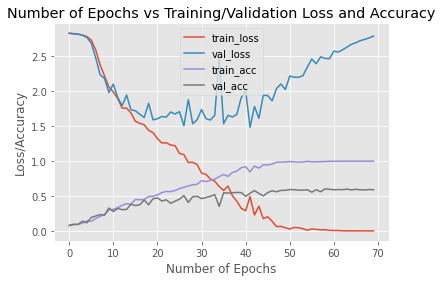

11/11 [==============================] - 0s 16ms/step - loss: 2.7910 - accuracy: 0.5912
The test set loss and accuracy is 
 [2.791020154953003, 0.591176450252533]


In [0]:
#------------------------------------- BUILDING THE NETWORK ARCHITECTURE 4---------------------------------------------------------

def arch_net4(width, height, depth, classes):
  
  # Initialize the model along with the input shape to be "channels last"
  model = tf.keras.Sequential() 
  inputShape = (height, width, depth)

  # Define the first layer that is convolutional layer
  model.add(tf.keras.layers.Conv2D (32, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
  # Define the second layer that is pooling layer 
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

  # Define the third layer that is convolutional layer
  model.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
  # Define the fourth layer that is pooling layer 
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

  # Define the fifth layer that is convolutional layer
  model.add(tf.keras.layers.Conv2D (128, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
  # Define the sixth layer that is pooling layer 
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

  # Define the seventh layer that is convolutional layer
  model.add(tf.keras.layers.Conv2D (256, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
  # Define the eight layer that is pooling layer 
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

  # Define the ninth layer that is flatten layer
  model.add(tf.keras.layers.Flatten())

  # Define the tenth layer that is dense layer 
  model.add(tf.keras.layers.Dense(600, activation='relu'))  

  # Define the elventh layer that is dense layer 
  model.add(tf.keras.layers.Dense(400, activation='relu'))  

  # Define the twelth layer that is dense layer 
  model.add(tf.keras.layers.Dense(200, activation='relu'))

  # Define the thirteenth and the output layer that is softmax layer
  model.add(tf.keras.layers.Dense(classes, activation='softmax'))

  return model

#-------------------------------- MODEL CREATION, TRAINING and RESULTS----------------------------------

# Call the defined baseline model 
model= arch_net4(width=128, height=128, depth=3, classes=17)

# Compile and train the model and produce the plots 
compile_train_plot(model)

### CNN Architecture 5 - Additional Experiment 


Compiling model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None,

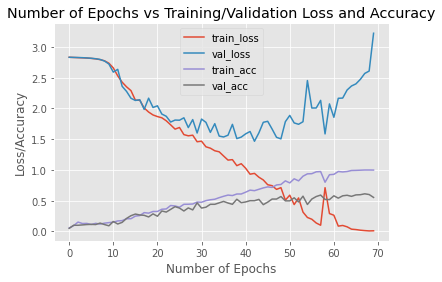

11/11 [==============================] - 0s 18ms/step - loss: 3.2240 - accuracy: 0.5529
The test set loss and accuracy is 
 [3.224003791809082, 0.5529412031173706]


In [0]:
#------------------------------------- BUILDING THE NETWORK ARCHITECTURE 4---------------------------------------------------------

def arch_net5(width, height, depth, classes):
  
  # Initialize the model along with the input shape to be "channels last"
  model = tf.keras.Sequential() 
  inputShape = (height, width, depth)

  # Define the first layer that is convolutional layer
  model.add(tf.keras.layers.Conv2D (32, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
  # Define the second layer that is pooling layer 
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

  # Define the third layer that is convolutional layer
  model.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
  # Define the fourth layer that is pooling layer 
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

  # Define the fifth layer that is convolutional layer
  model.add(tf.keras.layers.Conv2D (128, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
  # Define the sixth layer that is pooling layer 
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

  # Define the seventh layer that is convolutional layer
  model.add(tf.keras.layers.Conv2D (256, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
  # Define the eight layer that is pooling layer 
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

  # Define the seventh layer that is convolutional layer
  model.add(tf.keras.layers.Conv2D (512, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
  # Define the eight layer that is pooling layer 
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

  # Define the ninth layer that is flatten layer
  model.add(tf.keras.layers.Flatten())

  # Define the tenth layer that is dense layer 
  model.add(tf.keras.layers.Dense(800, activation='relu'))  

  # Define the tenth layer that is dense layer 
  model.add(tf.keras.layers.Dense(600, activation='relu'))  

  # Define the elventh layer that is dense layer 
  model.add(tf.keras.layers.Dense(400, activation='relu'))  

  # Define the twelth layer that is dense layer 
  model.add(tf.keras.layers.Dense(200, activation='relu'))

  # Define the thirteenth and the output layer that is softmax layer
  model.add(tf.keras.layers.Dense(classes, activation='softmax'))

  return model

#-------------------------------- MODEL CREATION, TRAINING and RESULTS----------------------------------

# Call the defined baseline model 
model= arch_net5(width=128, height=128, depth=3, classes=17)

# Compile and train the model and produce the plots 
compile_train_plot(model)

### Function for getting the generator object, training and ploting the model with Data Augmentation 

In [0]:
def get_generator_objects():
  """
  This function returns the generator objects for training and validation data 
  """
  # ---------------------- DATA AUGMENTATION CONFIGURATION 1------------------------------------

  train_data_generator1 = tf.keras.preprocessing.image.ImageDataGenerator(
      zoom_range=-0.2,
      shear_range=0.2,
      vertical_flip=False,
      rotation_range=30,
      horizontal_flip=True)
  
  # ---------------------- DATA AUGMENTATION CONFIGURATION 2------------------------------------

  train_data_generator2 = tf.keras.preprocessing.image.ImageDataGenerator(
      zoom_range=-0.2,
      shear_range=0.2,
      vertical_flip=True,
      rotation_range=30,
      horizontal_flip=False,
      height_shift_range=0.1,
      width_shift_range=0.1)
  
  validation_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale=1.0/255)
    
  train_generator1 = train_data_generator1.flow(X_train, y_train)
  train_generator2 = train_data_generator2.flow(X_train, y_train)
  validation_generator= validation_data_generator.flow(X_test, y_test)
  
  return train_generator1, train_generator2, validation_generator

def train_with_DA(model, train_generator):
  """
  DA------> Data Augmentation 
  This function compiles and train the model and produce the desired results 
  """
  # Specify the number of epochs 
  NUM_EPOCHS = 70

  # Initialize the optimizer and model
  print("Compiling model...")

  # Set the optimizer 
  opt = tf.keras.optimizers.SGD(lr=0.01)

  # Print the model settings 
  print (model.summary())

  # Compile the model 
  model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

#-------------------------------------- CODE FOR TRAINING THE MODEL--------------------------------------------------------

  # Train the network
  batchSize= 64
  train_steps = X_train.shape[0] // batchSize
  validation_steps = X_test.shape[0] // batchSize

  print("Training network...")
  history= model.fit(train_generator, steps_per_epoch= train_steps,
                     epochs= NUM_EPOCHS,
                     validation_data= (X_test, y_test), validation_steps=validation_steps)

#-----------------------CODE FOR PLOTTING THE TRAINING LOSS AND ACCURACY & VALIDATION LOSS AND ACCURACY-------------------------- 

  plt.style.use("ggplot")
  plt.figure()

  upper_limit= NUM_EPOCHS
  plt.plot(np.arange(0, upper_limit), history.history["loss"], label="train_loss")
  plt.plot(np.arange(0, upper_limit), history.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, upper_limit), history.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, upper_limit), history.history["val_accuracy"], label="val_acc")
  plt.title("Number of Epochs vs Training/Validation Loss and Accuracy")
  plt.xlabel("Number of Epochs")
  plt.ylabel("Loss/Accuracy")
  plt.legend()
  plt.show()
#------------------------------ TEST SET RESULTS-------------------------------------------------

  # Get the predictions from our basic model 
  results= model.evaluate(X_test, y_test)
  # Print the test set loss and the accuracy 
  print("The test set loss and accuracy is \n",results)

### Application of Data Augmentation Configuration 1 on CNN Architecture 3

Compiling model...
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_75 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_77 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
flatten_25 (Flatten)         (None

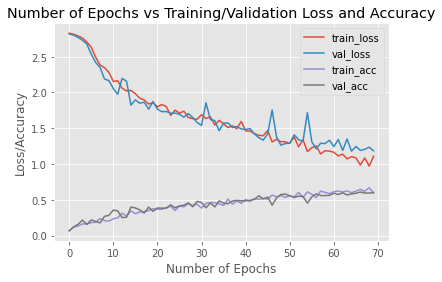

11/11 [==============================] - 0s 10ms/step - loss: 1.1842 - accuracy: 0.6000
The test set loss and accuracy is 
 [1.184156894683838, 0.6000000238418579]


In [0]:
# Call the defined baseline model 
model= arch_net3(width=128, height=128, depth=3, classes=17)

# Get the generator objects for training and validation 
train_generator1, train_generator2, validation_generator= get_generator_objects()

# Compile and train the model and produce the plots 
train_with_DA(model, train_generator1)

### Application of Data Augmentation Configuration 2 on CNN Architecture 3

Compiling model...
Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_81 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_83 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
flatten_27 (Flatten)         (None

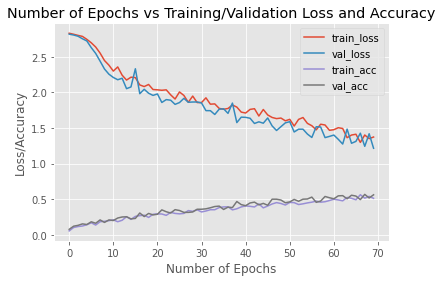

11/11 [==============================] - 0s 9ms/step - loss: 1.2161 - accuracy: 0.5618
The test set loss and accuracy is 
 [1.2160934209823608, 0.5617647171020508]


In [0]:
# Call the defined baseline model 
model= arch_net3(width=128, height=128, depth=3, classes=17)

# Get the generator objects for training and validation 
train_generator1, train_generator2, validation_generator= get_generator_objects()

# Compile and train the model and produce the plots 
train_with_DA(model, train_generator2)

### Application of Data Augmentation Configuration 1 on CNN Architecture 4

Compiling model...
Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_84 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_84 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_85 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_86 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None

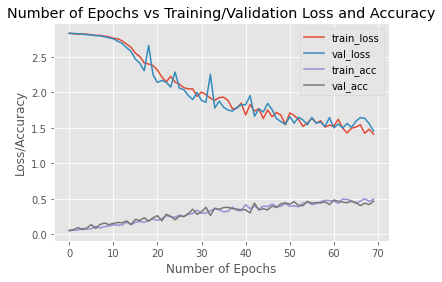

11/11 [==============================] - 0s 13ms/step - loss: 1.4570 - accuracy: 0.4676
The test set loss and accuracy is 
 [1.457032561302185, 0.4676470458507538]


In [0]:
# Call the defined baseline model 
model= arch_net4(width=128, height=128, depth=3, classes=17)

# Get the generator objects for training and validation 
train_generator1, train_generator2, validation_generator= get_generator_objects()

# Compile and train the model and produce the plots 
train_with_DA(model, train_generator1)

### Application of Data Augmentation Configuration 2 on CNN Architecture 4 

Compiling model...
Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_88 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_88 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_89 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_90 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None

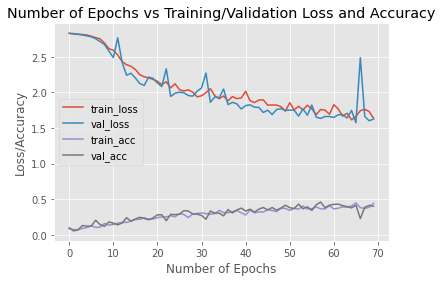

11/11 [==============================] - 0s 11ms/step - loss: 1.6251 - accuracy: 0.4000
The test set loss and accuracy is 
 [1.6250592470169067, 0.4000000059604645]


In [0]:
# Call the defined baseline model 
model= arch_net4(width=128, height=128, depth=3, classes=17)

# Get the generator objects for training and validation 
train_generator1, train_generator2, validation_generator= get_generator_objects()

# Compile and train the model and produce the plots 
train_with_DA(model, train_generator2)

### Application of Ensemble technique on Flower-17 dataset 

In [0]:
def baseLearner1(width, height, depth, classes):
  
  # Initialize the model along with the input shape to be "channels last"
  model = tf.keras.Sequential() 
  inputShape = (height, width, depth)

  # Define the first layer that is convolutional layer
  model.add(tf.keras.layers.Conv2D (32, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
  # Define the second layer that is pooling layer 
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

  # Define the third layer that is convolutional layer
  model.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
  # Define the fourth layer that is pooling layer 
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

  # Define the fifth layer that is convolutional layer
  model.add(tf.keras.layers.Conv2D (128, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
  # Define the sixth layer that is pooling layer 
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

  # Define the seventh layer that is convolutional layer
  model.add(tf.keras.layers.Conv2D (256, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
  # Define the eight layer that is pooling layer 
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

  # Define the ninth layer that is flatten layer
  model.add(tf.keras.layers.Flatten())

  # Define the tenth layer that is dense layer 
  model.add(tf.keras.layers.Dense(600, activation='relu'))  

  # Define the elventh layer that is dense layer 
  model.add(tf.keras.layers.Dense(400, activation='relu'))  

  # Define the twelth layer that is dense layer 
  model.add(tf.keras.layers.Dense(200, activation='relu'))

  # Define the thirteenth and the output layer that is softmax layer
  model.add(tf.keras.layers.Dense(classes, activation='softmax'))

  return model

def baseLearner2(width, height, depth, classes):
  
  # initialize the model
  model = tf.keras.models.Sequential()
  inputShape = (height, width, depth)

  # first set of CONV => RELU => POOL layers
  model.add(tf.keras.layers.Conv2D(20, (5, 5), padding="same",input_shape=inputShape, activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

  # second set of CONV => RELU => POOL layers
  model.add(tf.keras.layers.Conv2D(50, (5, 5), padding="same", activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

  # third set of CONV => RELU => POOL layers
  model.add(tf.keras.layers.Conv2D(100, (5, 5), padding="same", activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

  # set of FC => RELU layers
  model.add(tf.keras.layers.Flatten())
  model.add(keras.layers.Dense(500, activation='relu'))
  model.add(keras.layers.Dense(200, activation='relu'))

  # softmax classifier
  model.add(tf.keras.layers.Dense(classes, activation='softmax'))

  return model

def baseLearner3(width, height, depth, classes):

  model = tf.keras.models.Sequential()
  inputShape = (height, width, depth)

  # first CONV => RELU => CONV => RELU => POOL => Dropout Layer 
  model.add(tf.keras.layers.Conv2D(32, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
  model.add(tf.keras.layers.Conv2D(32, (3, 3), padding="same",activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.SpatialDropout2D(rate=0.25))

	# second CONV => RELU => CONV => RELU => POOL => Dropout Layer 
  model.add(tf.keras.layers.Conv2D(64, (3, 3), padding="same",activation='relu'))
  model.add(tf.keras.layers.Conv2D(64, (3, 3), padding="same",activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.SpatialDropout2D(rate=0.25))  

	# third CONV => RELU => CONV => RELU => POOL => Dropout Layer 
  model.add(tf.keras.layers.Conv2D(128, (3, 3), padding="same",activation='relu'))
  model.add(tf.keras.layers.Conv2D(128, (3, 3), padding="same",activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.SpatialDropout2D(rate=0.25))

  # fourth CONV => RELU => CONV => RELU => POOL => Dropout Layer 
  model.add(tf.keras.layers.Conv2D(256, (3, 3), padding="same",activation='relu'))
  model.add(tf.keras.layers.Conv2D(256, (3, 3), padding="same",activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.SpatialDropout2D(rate=0.25))

  # set of FC => RELU layers
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(500,activation='relu'))
  model.add(tf.keras.layers.Dense(200,activation='relu'))
  model.add(tf.keras.layers.Dropout(rate=0.5))

  # softmax classifier
  model.add(tf.keras.layers.Dense(classes, activation='softmax'))

  # return the constructed network architecture
  return model

def baseLearner4(width, height, depth, classes):
  
  model = tf.keras.models.Sequential()

  inputShape = (height, width, depth)

  # first CONV => CONV => POOL layer set
  model.add(tf.keras.layers.Conv2D(32, (3, 3), padding="same",input_shape=inputShape, activation='relu'))
  model.add(tf.keras.layers.Conv2D(32, (3, 3), padding="same",activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

  # second CONV => CONV => POOL layer set
  model.add(tf.keras.layers.Conv2D(64, (3, 3), padding="same",activation='relu'))
  model.add(tf.keras.layers.Conv2D(64, (3, 3), padding="same",activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

  # first (and only) set of FC => RELU layers
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(512,activation='relu'))

  # softmax classifier
  model.add(tf.keras.layers.Dense(classes, activation='softmax'))

  # return the constructed network architecture
  return model  

def compile_train_plot(model, fname, X_train, y_train, X_test, y_test):
  # Specify the number of epochs 
  NUM_EPOCHS = 70

  # Initialize the optimizer and model
  print("Compiling model...")

  # Set the optimizer 
  opt = tf.keras.optimizers.SGD(lr=0.01)

  # Print the model settings 
  print (model.summary())

  # Compile the model 
  model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

#-------------------------------------- CODE FOR TRAINING THE MODEL--------------------------------------------------------

  # Train the network
  print("Training network...")
  checkpoint = tf.keras.callbacks.ModelCheckpoint(fname, monitor="val_loss", mode="min", save_best_only=True, verbose=1)
  history= model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=NUM_EPOCHS, callbacks=[checkpoint])

#-----------------------CODE FOR PLOTTING THE TRAINING LOSS AND ACCURACY & VALIDATION LOSS AND ACCURACY-------------------------- 

  plt.style.use("ggplot")
  plt.figure()

  upper_limit= NUM_EPOCHS
  plt.plot(np.arange(0, upper_limit), history.history["loss"], label="train_loss")
  plt.plot(np.arange(0, upper_limit), history.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, upper_limit), history.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, upper_limit), history.history["val_accuracy"], label="val_acc")
  plt.title("Number of Epochs vs Training/Validation Loss and Accuracy")
  plt.xlabel("Number of Epochs")
  plt.ylabel("Loss/Accuracy")
  plt.legend()
  plt.show()
#------------------------------ TEST SET RESULTS-------------------------------------------------

  # Get the predictions from our basic model 
  results= model.evaluate(X_test, y_test)
  # Print the test set loss and the accuracy 
  print("The test set loss and accuracy is \n",results)

Compiling model...
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_76 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None

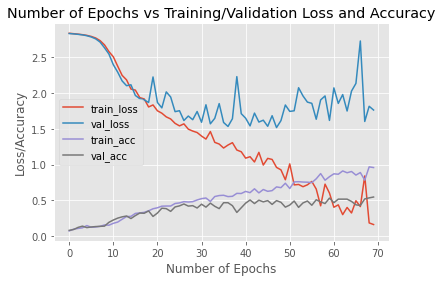

11/11 [==============================] - 0s 11ms/step - loss: 1.7598 - accuracy: 0.5471
The test set loss and accuracy is 
 [1.7598086595535278, 0.5470588207244873]
Compiling model...
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_80 (Conv2D)           (None, 128, 128, 20)      1520      
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 64, 64, 20)        0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 64, 64, 50)        25050     
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 32, 32, 50)        0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 32, 32, 100)       125100    
_________________________________________________________________
m

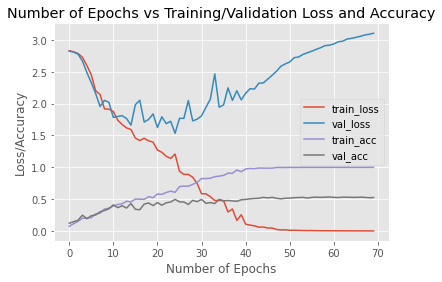

11/11 [==============================] - 0s 12ms/step - loss: 3.1033 - accuracy: 0.5265
The test set loss and accuracy is 
 [3.103313446044922, 0.5264706015586853]
Compiling model...
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_83 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
spatial_dropout2d_16 (Spatia (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
co

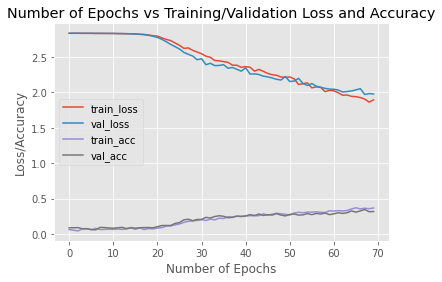

11/11 [==============================] - 0s 20ms/step - loss: 1.9758 - accuracy: 0.3176
The test set loss and accuracy is 
 [1.9758161306381226, 0.3176470696926117]
Compiling model...
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_91 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
m

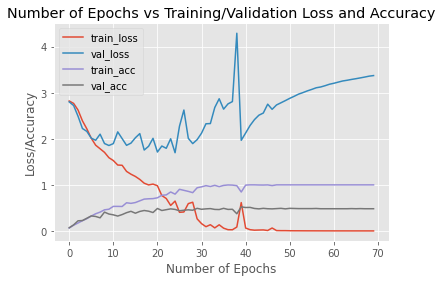

11/11 [==============================] - 0s 16ms/step - loss: 3.3709 - accuracy: 0.4824
The test set loss and accuracy is 
 [3.370889902114868, 0.48235294222831726]


In [77]:
# Initialize all the base learners 
model_1= baseLearner1(width=128, height=128, depth=3, classes=17)
model_2= baseLearner2(width=128, height=128, depth=3, classes=17)
model_3= baseLearner3(width=128, height=128, depth=3, classes=17)
model_4= baseLearner4(width=128, height=128, depth=3, classes=17)

# Store all the models in a list 
models_list= [model_1, model_2, model_3, model_4]

# Training of all base models 
for model_num in range(len(models_list)):
  model_name= models_list[model_num].name
  fname = f"{model_name}"+"_weights.{epoch:02d}-{val_loss:.2f}.hdf5"
  # Train each base learner 
  compile_train_plot(models_list[model_num], fname, X_train, y_train, X_test, y_test)

In [80]:
# Load the trained models 
trained_model1= tf.keras.models.load_model('sequential_16_weights.48-1.52.hdf5')
trained_model2= tf.keras.models.load_model('sequential_17_weights.25-1.53.hdf5')
trained_model3= tf.keras.models.load_model('sequential_18_weights.68-1.97.hdf5')
trained_model4= tf.keras.models.load_model('sequential_19_weights.25-1.70.hdf5')

# Store all the models in the list 
trained_models= [trained_model1, trained_model2, trained_model3, trained_model4]

# A list to store all the predictions by these trained models 
prediction_labels= []
for model in trained_models:
  pred= model.predict(X_test)
  prediction_labels.append(pred)

# Take the average of all the predictions labels 
prediction_avg= sum(prediction_labels)/len(prediction_labels)

# Get the number of correct predictions 
pred_correct= tf.equal(tf.argmax(prediction_avg,-1), y_test)

# Get the accuracy 
acc= tf.reduce_mean(tf.cast(pred_correct, tf.float32))

print("The accuracy with ensemble of 4 CNN models on Flower-17 dataset is {}".format(acc))

The accuracy with ensemble of 4 CNN models on Flower-17 dataset is 0.5323529243469238
